# **Model evaluation <<< Starts from here >>>**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import sklearn
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)

In [2]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
sklearn.__version__

'0.20.3'

In [4]:
fill_iter_impute = pd.read_csv("./hospitaldata_iterative.csv")
fill_knn = pd.read_csv("./hospitaldata_knn.csv")
fill_mean = pd.read_csv("./hospitaldata_mean.csv")

In [5]:
fill_iter_impute.head(3)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.5,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0
2,2,2,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,3.6,14.9,3.200000,8.8,13.2,17.2,17.2,1.28,7.19,3.31,4.95,0.65,1.38,0.46,181.42,0.30,0.11,0.97,3.38,79.0,89.0,91.0,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0,2.0


In [6]:
fill_knn.head(2)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.5,2.982951,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0


In [7]:
fill_mean.head(2)

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83,87,90,75,70,85,79,83,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.5,3.230405,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87,91,94,85,81,88,81,88,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3


In [8]:
# Doing this to match colum as other data sets.
fill_mean = fill_mean[fill_knn.columns]

# Iterative inpute

In [9]:
fill_iter_impute.head(2)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.5,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0


In [10]:
fill_iter_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [26]:
def getXY(data): 
    data_copy = data.copy(deep=True)
    data_copy.drop(data_copy.columns[list(range(0,8))], axis=1, inplace=True)
    data_copy.drop(['H_RECMND_LINEAR_SCORE'], axis=1, inplace=True)
#     len(fill_iter_impute_copy.columns)
    X = data_copy.iloc[:,list(range(0,30))]
    YY = data_copy.iloc[:,[-1]]
    Y = YY.STAR_RATING
    return X, Y

In [47]:
def getXY_regression(data):
    data_copy = fill_iter_impute.copy(deep=True)
    data_copy.drop(data_copy.columns[list(range(0,8))], axis=1, inplace=True)
    data_copy.drop(['STAR_RATING'], axis=1, inplace=True)
    # X = data_copy.iloc[:,list(range(0,30))]
    Y = data_copy['H_RECMND_LINEAR_SCORE']
    data_copy.drop(['H_RECMND_LINEAR_SCORE'],axis=1, inplace=True)
    X = data_copy.copy(deep=True)
    return X, Y

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def run_model(model, X, Y, fit_only=False):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    labels_predicted = [1,2,3,4,5]
#     model_lda = LDA()
    if not fit_only:
        predicted = model.fit_transform(X_train, y_train)
    if fit_only:
        predicted = model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Score for the model {0}".format(score))
    # model_lda.predict(X.iloc[0:1,:])
    y_pred_on_test_data = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_on_test_data)
    # confusion_matrix
    conf_matrix = pd.DataFrame(confusion_matrix, columns=[1,2,3,4,5])
    conf_matrix.index = np.arange(1, len(conf_matrix)+1)

    class_names=[1,2,3,4,5] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    precision_recall = metrics.classification_report(y_test, y_pred_on_test_data)
    print(precision_recall)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_on_test_data))
    print("Precision:",metrics.precision_score(y_test, y_pred_on_test_data, labels=class_names, average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred_on_test_data,labels=class_names, average='weighted'))
    print("F1 Score", metrics.f1_score(y_test, y_pred_on_test_data, labels=labels_predicted, average='weighted'))
    
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==1])
#     print(np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==2]))
#     print(14+107+14)
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==3])
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==4])
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==5])

# Precision = True+ve/True+ve + False
    return score, precision_recall, conf_matrix, model  

In [157]:
# precision (predicted labels)
print(26/(26+1))

0.9629629629629629


In [158]:
# Recall
print(26/(26+14))

0.65


# LDA

## Impute

Score for the model 0.7960339943342776
              precision    recall  f1-score   support

         1.0       0.96      0.65      0.78        40
         2.0       0.79      0.75      0.77       143
         3.0       0.78      0.88      0.83       302
         4.0       0.81      0.76      0.78       190
         5.0       0.76      0.61      0.68        31

   micro avg       0.80      0.80      0.80       706
   macro avg       0.82      0.73      0.77       706
weighted avg       0.80      0.80      0.79       706

Accuracy: 0.7960339943342776
Precision: 0.7996480325495843
Recall: 0.7960339943342776
F1 Score 0.7943089718954809


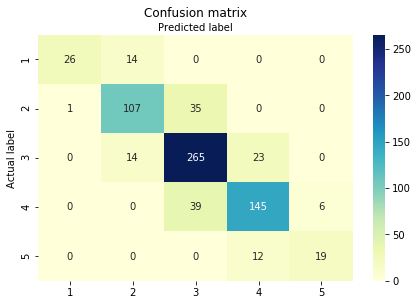

In [159]:
X, Y = getXY(fill_iter_impute)
model_lda = LDA()
lda_output = run_model(model_lda, X, Y)

Score for the model 0.7960339943342776
              precision    recall  f1-score   support

         1.0       0.96      0.65      0.78        40
         2.0       0.79      0.75      0.77       143
         3.0       0.78      0.88      0.83       302
         4.0       0.81      0.76      0.78       190
         5.0       0.76      0.61      0.68        31

   micro avg       0.80      0.80      0.80       706
   macro avg       0.82      0.73      0.77       706
weighted avg       0.80      0.80      0.79       706

Accuracy: 0.7960339943342776
Precision: 0.8205644051130776
Recall: 0.7303592625007302


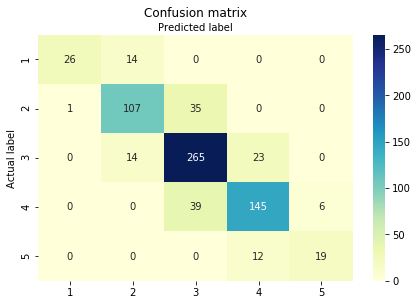

In [118]:
X, Y = getXY(fill_iter_impute)
model_qda = LDA()
qda_output = run_model(model_qda, X, Y, fit_only=True)

# KNN data

Score for the model 0.8031161473087819
              precision    recall  f1-score   support

         1.0       0.96      0.62      0.76        40
         2.0       0.78      0.76      0.77       143
         3.0       0.80      0.87      0.83       302
         4.0       0.82      0.79      0.80       190
         5.0       0.79      0.61      0.69        31

   micro avg       0.80      0.80      0.80       706
   macro avg       0.83      0.73      0.77       706
weighted avg       0.81      0.80      0.80       706

Accuracy: 0.8031161473087819
Precision: 0.8284349341944942
Recall: 0.7327573715370407


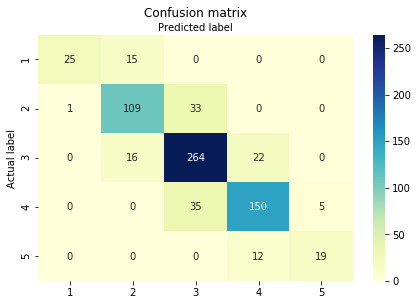

In [119]:
X, Y = getXY(fill_knn)
model_qda_knn = LDA()
model_qda_knn_output = run_model(model_qda_knn, X, Y, fit_only=True)

## Mean Data

Score for the model 0.660056657223796
              precision    recall  f1-score   support

           1       0.67      0.35      0.46        40
           2       0.61      0.63      0.62       143
           3       0.71      0.79      0.75       302
           4       0.73      0.53      0.61       190
           5       0.35      0.71      0.47        31

   micro avg       0.66      0.66      0.66       706
   macro avg       0.61      0.60      0.58       706
weighted avg       0.68      0.66      0.66       706

Accuracy: 0.660056657223796
Precision: 0.6143283766744904
Recall: 0.6020131649908238


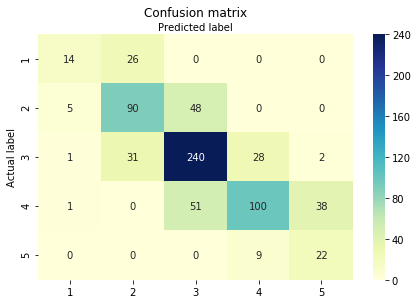

In [117]:
X, Y = getXY(fill_mean)
model_qda_mean = QDA()
model_qda_mean_output = run_model(model_qda_mean, X, Y, fit_only=True)

# Logistic Regression

## Imputate Data

In [18]:
from sklearn.linear_model import LogisticRegression

Score for the model 0.5963172804532578
              precision    recall  f1-score   support

         1.0       0.89      0.20      0.33        40
         2.0       0.52      0.24      0.33       143
         3.0       0.56      0.92      0.70       302
         4.0       0.74      0.46      0.57       190
         5.0       0.79      0.48      0.60        31

   micro avg       0.60      0.60      0.60       706
   macro avg       0.70      0.46      0.50       706
weighted avg       0.63      0.60      0.56       706

Accuracy: 0.5963172804532578
Precision: 0.6993399582873268
Recall: 0.45934929707852723


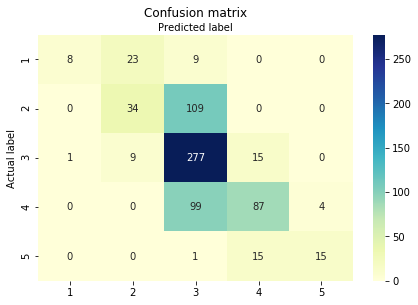

In [19]:
# solver='lbfgs','newton-cg' failed to converge
X, Y = getXY(fill_iter_impute)
model_logistic = LogisticRegression(solver='liblinear', fit_intercept=False,C=1000000,multi_class='auto', max_iter=1000)
# .fit(X,Y)
# model_logistic.predict(X_test)

logistic_impute = run_model(model_logistic, X, Y, fit_only=True)

## KNN Data

Score for the model 0.5934844192634561
              precision    recall  f1-score   support

         1.0       0.88      0.17      0.29        40
         2.0       0.52      0.24      0.33       143
         3.0       0.56      0.91      0.69       302
         4.0       0.73      0.47      0.57       190
         5.0       0.88      0.45      0.60        31

   micro avg       0.59      0.59      0.59       706
   macro avg       0.71      0.45      0.49       706
weighted avg       0.63      0.59      0.56       706

Accuracy: 0.5934844192634561
Precision: 0.7102679747632292
Recall: 0.44867844402193785


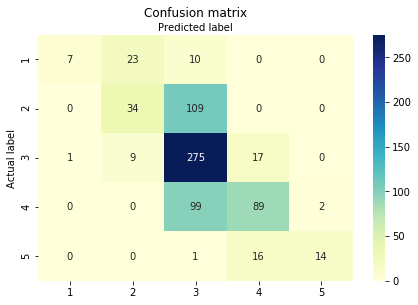

In [20]:
X, Y = getXY(fill_knn)
model_logistic_knn = LogisticRegression(solver='liblinear', fit_intercept=False,C=1000000,multi_class='auto', max_iter=1000)
logistic_knn = run_model(model_logistic_knn, X, Y, fit_only=True)

## Mean

Score for the model 0.5892351274787535
              precision    recall  f1-score   support

           1       0.80      0.20      0.32        40
           2       0.50      0.22      0.30       143
           3       0.55      0.91      0.69       302
           4       0.72      0.47      0.57       190
           5       0.88      0.45      0.60        31

   micro avg       0.59      0.59      0.59       706
   macro avg       0.69      0.45      0.49       706
weighted avg       0.62      0.59      0.55       706

Accuracy: 0.5892351274787535
Precision: 0.6904225178615423
Recall: 0.4488203881705045


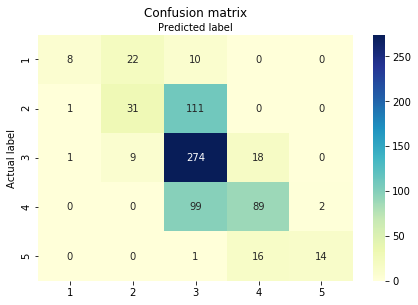

In [21]:
X, Y = getXY(fill_mean)
model_logistic_mean = LogisticRegression(solver='liblinear', fit_intercept=False,C=1000000,multi_class='auto', max_iter=1000)
logistic_mean = run_model(model_logistic_mean, X, Y, fit_only=True)

# GradientBoostingRegressor 

In [160]:
import matplotlib.pylab as plt
def regression_metrics(model, X, Y, plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    model.fit(X_train,y_train)
#     print("******Score {0}".format(model.score())
    
#     plt.plot(model.staged_predict(X_test))
    y_pred_on_test_data = model.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_on_test_data)
    rmse_dt = mse_dt**(1/2)

    # Print rmse_dt
    print("Test set RMSE of dt: {:.2f} (before the square root-{:.2f})".format(rmse_dt, mse_dt))
    MSE_CV_scores = - cross_val_score(model, X_train, y_train, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 

    # Compute the 10-folds CV RMSE
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)

    # Print RMSE_CV
    print('CV RMSE: {:.2f}'.format(RMSE_CV))
    if plot:
        plt.plot(model.train_score_)
        plt.show()
    if plot:
        plt.barh(model.feature_importances_, height=0.5, width=0.5)
        plt.show()
    return model

## Impute Data

In [161]:
X, Y = getXY_regression(fill_iter_impute)
model_gradient_impute = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')
mod = regression_metrics(model_gradient_impute, X, Y, plot=False)

Test set RMSE of dt: 1.74 (before the square root-3.02)
CV RMSE: 1.70


In [162]:
mod.feature_importances_

array([0.00373189, 0.00621715, 0.00435857, 0.00210365, 0.00230862,
       0.0030111 , 0.00440614, 0.00318086, 0.00424663, 0.00280044,
       0.00227945, 0.00321823, 0.00380428, 0.00425636, 0.00315708,
       0.00354973, 0.00091318, 0.00153219, 0.00371742, 0.00427755,
       0.00833455, 0.00135301, 0.00403589, 0.00304821, 0.00267655,
       0.00389136, 0.88363472, 0.00382189, 0.01771766, 0.00441563])

In [111]:
feature = pd.Series(mod.feature_importances_)

<BarContainer object of 30 artists>

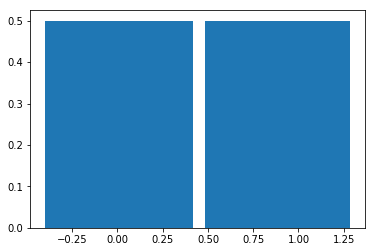

In [112]:
plt.bar(feature, height=0.5)

In [163]:
X, Y = getXY_regression(fill_iter_impute)
for i in range(1,20):
    print("*"*50," Max Depth: ",i )
    model_gradient_impute = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')
    regression_metrics(model_gradient_impute, X, Y)

**************************************************  Max Depth:  1
Test set RMSE of dt: 1.29 (before the square root-1.67)
CV RMSE: 1.31
**************************************************  Max Depth:  2
Test set RMSE of dt: 1.26 (before the square root-1.59)
CV RMSE: 1.28
**************************************************  Max Depth:  3
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
**************************************************  Max Depth:  4
Test set RMSE of dt: 1.28 (before the square root-1.63)
CV RMSE: 1.26
**************************************************  Max Depth:  5
Test set RMSE of dt: 1.28 (before the square root-1.64)
CV RMSE: 1.27
**************************************************  Max Depth:  6
Test set RMSE of dt: 1.33 (before the square root-1.76)
CV RMSE: 1.28
**************************************************  Max Depth:  7
Test set RMSE of dt: 1.33 (before the square root-1.78)
CV RMSE: 1.29
************************************************

## KNN data

In [164]:
X, Y = getXY_regression(fill_knn)

for i in range(1,10):
    print("*"*50,"KNN data Max Depth: ",i )
    model_gradient_knn = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0, loss='ls')
    regression_metrics(model_gradient_knn, X, Y)

************************************************** KNN data Max Depth:  1
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** KNN data Max Depth:  2
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** KNN data Max Depth:  3
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** KNN data Max Depth:  4
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** KNN data Max Depth:  5
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** KNN data Max Depth:  6
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** KNN data Max Depth:  7
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMS

## Mean data

In [165]:
X, Y = getXY_regression(fill_mean)
for i in range(1,10):
    print("*"*50,"Mean Data-  Max Depth: ",i )
    model_gradient_mean = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')
    regression_metrics(model_gradient_mean, X, Y)

************************************************** Mean Data-  Max Depth:  1
Test set RMSE of dt: 1.29 (before the square root-1.67)
CV RMSE: 1.31
************************************************** Mean Data-  Max Depth:  2
Test set RMSE of dt: 1.26 (before the square root-1.59)
CV RMSE: 1.28
************************************************** Mean Data-  Max Depth:  3
Test set RMSE of dt: 1.25 (before the square root-1.57)
CV RMSE: 1.27
************************************************** Mean Data-  Max Depth:  4
Test set RMSE of dt: 1.28 (before the square root-1.63)
CV RMSE: 1.26
************************************************** Mean Data-  Max Depth:  5
Test set RMSE of dt: 1.28 (before the square root-1.64)
CV RMSE: 1.27
************************************************** Mean Data-  Max Depth:  6
Test set RMSE of dt: 1.33 (before the square root-1.76)
CV RMSE: 1.28
************************************************** Mean Data-  Max Depth:  7
Test set RMSE of dt: 1.33 (before the squ

In [28]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# read in all three filled datasets
mean = pd.read_csv('hospitaldata_mean.csv')  # filled with mean values
iterative = pd.read_csv('hospitaldata_iterative.csv')  # filled with linear regression
knn = pd.read_csv('hospitaldata_knn.csv')  # filled with knn

mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,2193,33,3


In [13]:
def run_OLS(df):
    
    # split train and test data
    xtrain, xtest, ytrain, ytest = train_test_split(
        df[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
                  'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
                  'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
                  'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
                  'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                  'H_QUIET_LINEAR_SCORE', 'Number of Completed Surveys', 'Survey Response Rate Percent']], 
        df[['H_RECMND_LINEAR_SCORE']], test_size=0.2, random_state=0)

    X = xtrain
    y = ytrain

    # fit multiple regression model
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    model.summary()
    
    # Compute y_pred_ols
    y_pred_ols = model.predict(xtest)

    # Compute mse_dt
    mse_ols = MSE(ytest, y_pred_ols)

    # Compute rmse_dt
    rmse_ols = mse_ols**(1/2)

    # Print rmse_dt
    print("Test set RMSE of OLS: {:.2f}".format(rmse_ols))

In [19]:
run_OLS(mean)

Test set RMSE of OLS: 1.34


In [20]:
run_OLS(iterative)

Test set RMSE of OLS: 1.34


In [21]:
run_OLS(knn)

Test set RMSE of OLS: 1.34


No difference between the 3 filled datasets when using multiple linear regression. All achieved RMSE of 1.34. 

In [40]:
def run_SVM(df, kernel_type):
    
    # split trainn and test data
    xtrain, xtest, ytrain, ytest = train_test_split(
        df[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
                  'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
                  'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
                  'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
                  'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                  'H_QUIET_LINEAR_SCORE', 'Number of Completed Surveys', 'Survey Response Rate Percent']], 
        df[['STAR_RATING']], test_size=0.2, random_state=0)
    
    # scale data
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.fit_transform(xtest)

    # run SVM
    svc = svm.SVC(kernel=kernel_type, C=1)
    svc.fit(xtrain, ytrain)
    y_pred_svm = svc.predict(xtest)
    print(classification_report(ytest, y_pred_svm))

In [41]:
run_SVM(mean, 'linear')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.97      0.75      0.85        40
           2       0.82      0.72      0.77       143
           3       0.77      0.88      0.82       302
           4       0.82      0.74      0.78       190
           5       0.73      0.71      0.72        31

    accuracy                           0.80       706
   macro avg       0.82      0.76      0.79       706
weighted avg       0.80      0.80      0.80       706



In [38]:
df = knn
xtrain, xtest, ytrain, ytest = train_test_split(
    df[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
              'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
              'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
              'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
              'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
              'H_QUIET_LINEAR_SCORE', 'Number of Completed Surveys', 'Survey Response Rate Percent']], 
    df[['STAR_RATING']], test_size=0.2, random_state=0)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

# run SVM
svc = svm.SVC(kernel='rbf', C=1)
svc.fit(xtrain, ytrain)
y_pred_svm = svc.predict(xtest)
print(classification_report(ytest, y_pred_svm))

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.88      0.38      0.53        40
         2.0       0.71      0.63      0.67       143
         3.0       0.72      0.89      0.80       302
         4.0       0.81      0.70      0.75       190
         5.0       0.73      0.61      0.67        31

    accuracy                           0.75       706
   macro avg       0.77      0.64      0.68       706
weighted avg       0.75      0.75      0.74       706



In [42]:
run_SVM(mean, 'rbf')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.88      0.38      0.53        40
           2       0.71      0.62      0.66       143
           3       0.72      0.89      0.80       302
           4       0.80      0.72      0.76       190
           5       0.81      0.55      0.65        31

    accuracy                           0.75       706
   macro avg       0.78      0.63      0.68       706
weighted avg       0.75      0.75      0.74       706



In [43]:
run_SVM(mean, 'poly')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.88      0.53      0.66        40
           2       0.60      0.35      0.44       143
           3       0.60      0.91      0.72       302
           4       0.80      0.47      0.59       190
           5       0.76      0.61      0.68        31

    accuracy                           0.64       706
   macro avg       0.72      0.57      0.62       706
weighted avg       0.67      0.64      0.62       706



In [44]:
run_SVM(iterative, 'linear')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.97      0.75      0.85        40
         2.0       0.82      0.73      0.77       143
         3.0       0.78      0.89      0.83       302
         4.0       0.82      0.76      0.79       190
         5.0       0.78      0.68      0.72        31

    accuracy                           0.80       706
   macro avg       0.83      0.76      0.79       706
weighted avg       0.81      0.80      0.80       706



In [45]:
run_SVM(iterative, 'rbf')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.89      0.42      0.58        40
         2.0       0.71      0.63      0.67       143
         3.0       0.72      0.88      0.79       302
         4.0       0.79      0.71      0.75       190
         5.0       0.78      0.58      0.67        31

    accuracy                           0.75       706
   macro avg       0.78      0.65      0.69       706
weighted avg       0.75      0.75      0.74       706



In [46]:
run_SVM(iterative, 'poly')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.92      0.57      0.71        40
         2.0       0.61      0.37      0.46       143
         3.0       0.60      0.89      0.72       302
         4.0       0.79      0.49      0.60       190
         5.0       0.79      0.61      0.69        31

    accuracy                           0.65       706
   macro avg       0.74      0.59      0.64       706
weighted avg       0.68      0.65      0.63       706



In [47]:
run_SVM(knn, 'linear')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.97      0.70      0.81        40
         2.0       0.80      0.72      0.76       143
         3.0       0.77      0.88      0.83       302
         4.0       0.81      0.76      0.78       190
         5.0       0.74      0.65      0.69        31

    accuracy                           0.80       706
   macro avg       0.82      0.74      0.77       706
weighted avg       0.80      0.80      0.79       706



In [48]:
run_SVM(knn, 'rbf')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.88      0.38      0.53        40
         2.0       0.71      0.63      0.67       143
         3.0       0.72      0.89      0.80       302
         4.0       0.81      0.70      0.75       190
         5.0       0.73      0.61      0.67        31

    accuracy                           0.75       706
   macro avg       0.77      0.64      0.68       706
weighted avg       0.75      0.75      0.74       706



In [49]:
run_SVM(knn, 'poly')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.84      0.53      0.65        40
         2.0       0.58      0.35      0.44       143
         3.0       0.60      0.90      0.72       302
         4.0       0.80      0.49      0.61       190
         5.0       0.79      0.61      0.69        31

    accuracy                           0.64       706
   macro avg       0.72      0.58      0.62       706
weighted avg       0.67      0.64      0.63       706



The filled datasets also performed roughly the same, with a linear kernel achieving accuracy of .80, rbf .75, and poly .64-.65. 

# Gradient Boosted Classification and XGBoost Regression Models

### Upload Relevant Datasets

In [1]:
import pandas as pd

In [2]:
#Upload hospitaldata_iterative.csv
hd_iter = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_iterative.csv')

In [3]:
hd_iter.head(1)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0


In [4]:
#Upload hospitaldata_knn.csv
hd_KMeans = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_knn.csv')

In [5]:
hd_KMeans.head(1)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0


In [6]:
#Upload hospitaldata_mean.csv
hd_means = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_mean.csv')

In [7]:
hd_means.head(1)

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2


## XGBoost

### Prepare the hospitaldata_iterative Dataset for the Regression Model Run

In [8]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [9]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_iter.drop(['STAR_RATING', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [10]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [11]:
#import the required packages
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [12]:
#split dataset in features and target variable
feature_cols = ['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_10_POST_KIDNEY','PSI_11_POST_RESP','PSI_12_POSTOP_PULMEMB_DVT','PSI_13_POST_SEPSIS','PSI_14_POSTOP_DEHIS','PSI_15_ACC_LAC','PSI_3_ULCER','PSI_4_SURG_COMP','PSI_6_IAT_PTX','PSI_8_POST_HIP','PSI_90_SAFETY','H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_3_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE','H_HSP_RATING_LINEAR_SCORE','H_QUIET_LINEAR_SCORE']
X = hd_iter[feature_cols] # Features
Y = hd_iter.H_RECMND_LINEAR_SCORE # Target variable

In [13]:
# split X and Y into training and testing sets
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [14]:
X_train.head(2)

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE
2499,2.8,13.1,3.2,8.8,13.9,14.0,13.0,1.64,8.29,4.66,...,1.02,87.0,92.0,93.0,85.0,76.0,87.0,83.0,91.0,86.0
2357,2.7,13.6,3.6,9.4,12.2,14.6,12.9,1.21,10.32,4.34,...,1.12,80.0,90.0,91.0,81.0,74.0,87.0,80.0,86.0,74.0


In [15]:
Y_train.head(2)

2499    92.0
2357    85.0
Name: H_RECMND_LINEAR_SCORE, dtype: float64

### Run XGBoost on the hospitaldata_iterative Dataset

In [16]:
import xgboost as xgb
from xgboost import plot_importance

In [17]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:78.995
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:71.111
[2]	Test-rmse:64.014
[3]	Test-rmse:57.6291
[4]	Test-rmse:51.8816
[5]	Test-rmse:46.7042
[6]	Test-rmse:42.0455
[7]	Test-rmse:37.8542
[8]	Test-rmse:34.0823
[9]	Test-rmse:30.6833
[10]	Test-rmse:27.6284
[11]	Test-rmse:24.8799
[12]	Test-rmse:22.407
[13]	Test-rmse:20.1804
[14]	Test-rmse:18.1772
[15]	Test-rmse:16.3744
[16]	Test-rmse:14.7527
[17]	Test-rmse:13.2952
[18]	Test-rmse:11.9844
[19]	Test-rmse:10.8062
[20]	Test-rmse:9.74886
[21]	Test-rmse:8.79642
[22]	Test-rmse:7.94322
[23]	Test-rmse:7.1801
[24]	Test-rmse:6.49303
[25]	Test-rmse:5.87411
[26]	Test-rmse:5.32376
[27]	Test-rmse:4.83231
[28]	Test-rmse:4.39434
[29]	Test-rmse:4.00009
[30]	Test-rmse:3.65169
[31]	Test-rmse:3.34173
[32]	Test-rmse:3.06626
[33]	Test-rmse:2.82421
[34]	Test-rmse:2.61072
[35]	Test-rmse:2.42424
[36]	Test-rmse:2.26033
[37]	Test-rmse:2.11751
[38]	Test-rmse:1.99386
[39]	Test-rmse:1.88885
[40]	Test-rmse:1.79651
[41]	Test-rmse:

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), Y_train)))
RMSE_iter_t = np.sqrt(mean_squared_error(model.predict(dpred), Y_train))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))
print("RMSE of XGB model on test data: ",
      np.sqrt(mean_squared_error(GBDT_test_pred, Y_test)))
RMSE_iter_test = np.sqrt(mean_squared_error(GBDT_test_pred, Y_test))


RMSE of XGB model on training data:  0.6481981464358001
RMSE of XGB model on test data:  1.310065897247246


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
https://www.statisticshowto.datasciencecentral.com/rmse/

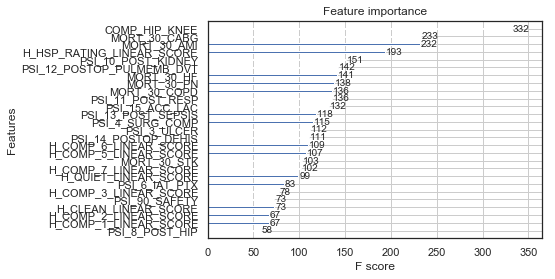

In [19]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

F Value in Regression
The F value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model), and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model’s fit.
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/

The F statistic is a ratio of 2 different measure of variance for the data. If the null hypothesis is true then these are both estimates of the same thing and the ratio will be around 1.

The numerator is computed by measuring the variance of the means and if the true means of the groups are identical then this is a function of the overall variance of the data. But if the null hypothesis is false and the means are not all equal, then this measure of variance will be larger.

The denominator is an average of the sample variances for each group, which is an estimate of the overall population variance (assuming all groups have equal variances).

So when the null of all means equal is true then the 2 measures (with some extra terms for degrees of freedom) will be similar and the ratio will be close to 1. If the null is false, then the numerator will be large relative to the denominator and the ratio will be greater than 1.

### Prepare the hospitaldata_knn.csv Dataset for the Regression Model Run

In [20]:
# Explore the KNN dataset
hd_KMeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [21]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_KMeans.drop(['STAR_RATING', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [22]:
# Explore the KNN dataset
hd_KMeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [23]:
#split dataset in features and target variable
X_k = hd_KMeans[feature_cols] # Features
Y_k = hd_KMeans.H_RECMND_LINEAR_SCORE # Target variable

In [24]:
# split X and Y into training and testing sets
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_k,Y_k,test_size=0.33, random_state=42)

In [25]:
X_train.head(2)

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE
2499,2.8,13.1,3.2,8.8,13.9,14.0,13.0,1.64,8.29,4.66,...,1.02,87.0,92.0,93.0,85.0,76.0,87.0,83.0,91.0,86.0
2357,2.7,13.6,3.6,9.4,12.2,14.6,12.9,1.21,10.32,4.34,...,1.12,80.0,90.0,91.0,81.0,74.0,87.0,80.0,86.0,74.0


In [26]:
Y_train.head(2)

2499    92.0
2357    85.0
Name: H_RECMND_LINEAR_SCORE, dtype: float64

### Run XGBoost on the hospitaldata_knn Dataset

In [27]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:78.995
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:71.111
[2]	Test-rmse:64.014
[3]	Test-rmse:57.6291
[4]	Test-rmse:51.8816
[5]	Test-rmse:46.7042
[6]	Test-rmse:42.0455
[7]	Test-rmse:37.8542
[8]	Test-rmse:34.0823
[9]	Test-rmse:30.6833
[10]	Test-rmse:27.6284
[11]	Test-rmse:24.8799
[12]	Test-rmse:22.407
[13]	Test-rmse:20.1804
[14]	Test-rmse:18.1772
[15]	Test-rmse:16.3744
[16]	Test-rmse:14.7527
[17]	Test-rmse:13.2952
[18]	Test-rmse:11.9844
[19]	Test-rmse:10.8055
[20]	Test-rmse:9.74798
[21]	Test-rmse:8.79561
[22]	Test-rmse:7.94182
[23]	Test-rmse:7.17118
[24]	Test-rmse:6.48391
[25]	Test-rmse:5.86907
[26]	Test-rmse:5.31781
[27]	Test-rmse:4.82748
[28]	Test-rmse:4.39016
[29]	Test-rmse:3.99836
[30]	Test-rmse:3.65117
[31]	Test-rmse:3.3451
[32]	Test-rmse:3.07196
[33]	Test-rmse:2.83048
[34]	Test-rmse:2.61553
[35]	Test-rmse:2.42884
[36]	Test-rmse:2.26754
[37]	Test-rmse:2.1263
[38]	Test-rmse:2.00295
[39]	Test-rmse:1.89879
[40]	Test-rmse:1.80834
[41]	Test-rmse:1

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), Y_train)))
RMSE_knn_t = np.sqrt(mean_squared_error(model.predict(dpred), Y_train))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))
print("RMSE of XGB model on test data: ",
      np.sqrt(mean_squared_error(GBDT_test_pred, Y_test)))
RMSE_knn_test = np.sqrt(mean_squared_error(GBDT_test_pred, Y_test))

RMSE of XGB model on training data:  0.8589708529100836
RMSE of XGB model on test data:  1.3471061889410627


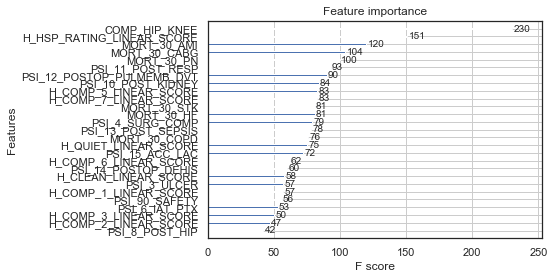

In [29]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

### Prepare the hospitaldata_mean.csv Dataset for the Regression Model Run

In [30]:
# Explore the Means dataset
hd_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT       3529 non-null float64
PSI_13_POST_SEPSIS              3529 non-null float64
PSI_14_POSTOP_DEHIS             3529 non-null float64
PSI_15_ACC_LAC                  3529 non-null float64
PSI_3_ULCER                     35

In [31]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_means.drop(['STAR_RATING', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [32]:
# Explore the Means dataset
hd_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [33]:
#split dataset in features and target variable
X_m = hd_means[feature_cols] # Features
Y_m = hd_means.H_RECMND_LINEAR_SCORE # Target variable

In [34]:
# split X and Y into training and testing sets
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_m,Y_m,test_size=0.33, random_state=42)

### Run XGBoost on the hospitaldata_mean Dataset

In [35]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:78.995
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:71.111
[2]	Test-rmse:64.014
[3]	Test-rmse:57.6291
[4]	Test-rmse:51.8816
[5]	Test-rmse:46.7042
[6]	Test-rmse:42.0455
[7]	Test-rmse:37.8542
[8]	Test-rmse:34.0823
[9]	Test-rmse:30.6833
[10]	Test-rmse:27.6284
[11]	Test-rmse:24.8799
[12]	Test-rmse:22.407
[13]	Test-rmse:20.1804
[14]	Test-rmse:18.1772
[15]	Test-rmse:16.3744
[16]	Test-rmse:14.7527
[17]	Test-rmse:13.2952
[18]	Test-rmse:11.9844
[19]	Test-rmse:10.8067
[20]	Test-rmse:9.74805
[21]	Test-rmse:8.79706
[22]	Test-rmse:7.94277
[23]	Test-rmse:7.17638
[24]	Test-rmse:6.48802
[25]	Test-rmse:5.87411
[26]	Test-rmse:5.32474
[27]	Test-rmse:4.83129
[28]	Test-rmse:4.39277
[29]	Test-rmse:3.99906
[30]	Test-rmse:3.65018
[31]	Test-rmse:3.34053
[32]	Test-rmse:3.06744
[33]	Test-rmse:2.82485
[34]	Test-rmse:2.61304
[35]	Test-rmse:2.42526
[36]	Test-rmse:2.2619
[37]	Test-rmse:2.1218
[38]	Test-rmse:1.9979
[39]	Test-rmse:1.89335
[40]	Test-rmse:1.80377
[41]	Test-rmse:1.

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), Y_train)))
RMSE_means_t = np.sqrt(mean_squared_error(model.predict(dpred), Y_train))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))
print("RMSE of XGB model on test data: ",
      np.sqrt(mean_squared_error(GBDT_test_pred, Y_test)))
RMSE_means_test = np.sqrt(mean_squared_error(GBDT_test_pred, Y_test))

RMSE of XGB model on training data:  0.8563673282875041
RMSE of XGB model on test data:  1.3407072651250194


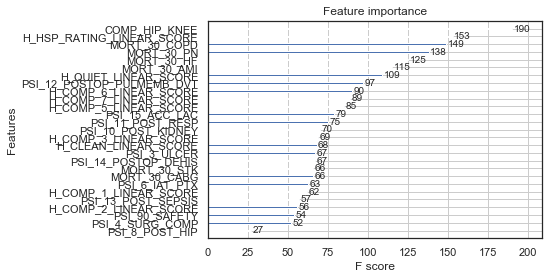

In [37]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

## Gradient Boosted Classification

### Prepare the hospitaldata_iterative Dataset for the Classification Model Run

In [38]:
#Upload hospitaldata_iterative.csv
hd_iter = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_iterative.csv')

In [39]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [40]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_iter.drop(['H_RECMND_LINEAR_SCORE', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [41]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [42]:
#split dataset in features and target variable
X_ig = hd_iter[feature_cols] # Features
Y_ig = hd_iter.STAR_RATING # Target variable

### Run Gradient Boosted on the hospitaldata_iterative Dataset

In [44]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_ig, Y_ig, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_train, Y_train) * 100, 2)

In [45]:
# Check the Gradient Boosted Accuracy against the test dataset
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
acc_train_iter = gbrt.score(X_train, Y_train)
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))
acc_test_iter = gbrt.score(X_test, Y_test)

Accuracy on training set: 0.926
Accuracy on test set: 0.818


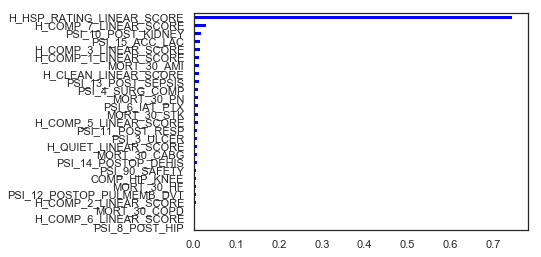

In [46]:
# Check the importance of the features
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_gbrt = pd.Series(gbrt.feature_importances_,
index = X.columns)
# Sort importances_fgbrt
sorted_importances_gbrt = importances_gbrt.sort_values()
# Make a horizontal bar plot
sorted_importances_gbrt.plot(kind='barh', color='blue')
plt.show()

In [47]:
# import the metrics class to compute the confusion matrix
from sklearn import metrics
Y_pred=gbrt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 39,  12,   0,   0,   0],
       [  3, 135,  44,   0,   0],
       [  0,  20, 326,  25,   0],
       [  0,   0,  43, 191,   2],
       [  0,   0,   0,  12,  31]])

Text(0.5, 257.44, 'Predicted label')

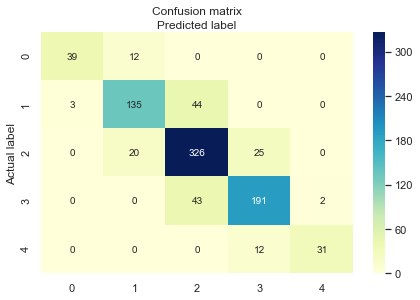

In [48]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# compute the confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
# Cross Validation - Entire dataset
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_ig, Y_ig, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.81408451 0.81355932 0.75637394 0.82386364 0.78977273
 0.78409091 0.74147727 0.78409091 0.80397727]
Mean: 0.7911290494025932
Standard Deviation: 0.024737665860501024


In [50]:
# Cross Validation - Training dataset
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78358209 0.75471698 0.77735849 0.7509434  0.75       0.76893939
 0.78409091 0.79166667 0.82954545 0.79087452]
Mean: 0.778171790643402
Standard Deviation: 0.022843147151134006


In [51]:
# Cross Validation - Training testing dataset
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_test, Y_test, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75       0.77777778 0.70786517 0.77272727 0.79545455 0.77272727
 0.8045977  0.77011494 0.87356322 0.89655172]
Mean: 0.792137962343309
Standard Deviation: 0.05293471496133599


### Model Validation - Accuracy - Precision - Recall - F1

#### Train Data Accuracy Report 

In [57]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_ig, Y_ig, random_state=0)

from sklearn.metrics import classification_report
y_true = Y_train
y_pred = gbrt.predict(X_train)
target_names = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      1 Star       1.00      0.96      0.98       129
     2 Stars       0.93      0.87      0.90       501
     3 Stars       0.91      0.95      0.93      1241
     4 Stars       0.93      0.92      0.92       654
     5 Stars       0.99      0.95      0.97       121

    accuracy                           0.93      2646
   macro avg       0.95      0.93      0.94      2646
weighted avg       0.93      0.93      0.93      2646



#### Test Data Accuracy Report

In [58]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_ig, Y_ig, random_state=0)

from sklearn.metrics import classification_report
y_true = Y_test
y_pred = gbrt.predict(X_test)
target_names = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      1 Star       0.93      0.76      0.84        51
     2 Stars       0.81      0.74      0.77       182
     3 Stars       0.79      0.88      0.83       371
     4 Stars       0.84      0.81      0.82       236
     5 Stars       0.94      0.72      0.82        43

    accuracy                           0.82       883
   macro avg       0.86      0.78      0.82       883
weighted avg       0.82      0.82      0.82       883



#### Model Results Interpretation

https://tutorials.datasciencedojo.com/introduction-precision-recall-f1/

https://www.youtube.com/watch?v=xugjARegisk


In [62]:
## print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Define dataset
y_true = Y_test
y_pred = gbrt.predict(X_test)

# Binarize the output
y_true = label_binarize(y_true, classes=[1, 2, 3, 4, 5])
n_classes = y_true.shape[1]
y_pred = label_binarize(y_pred, classes=[1, 2, 3, 4, 5])
n_classes2 = y_pred.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_pred[:, i], y_true[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_pred.ravel(), y_true.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

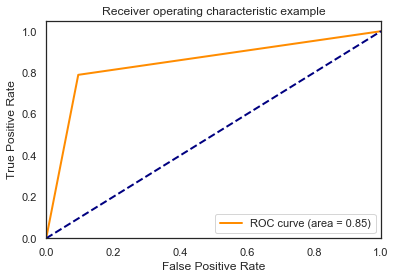

In [63]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Prepare the hospitaldata_knn Dataset for the Classification Model Run

In [169]:
#Upload hospitaldata_knn.csv
hd_KMeans_G = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_knn.csv')

In [170]:
# Explore the KNN dataset
hd_KMeans_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [171]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_KMeans_G.drop(['H_RECMND_LINEAR_SCORE', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [172]:
# Explore the KNN dataset
hd_KMeans_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [173]:
#split dataset in features and target variable
X_kg = hd_KMeans_G[feature_cols] # Features
Y_kg = hd_KMeans_G.STAR_RATING # Target variable

### Run Gradient Boosted on the hospitaldata_knn Dataset

In [174]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_kg, Y_kg, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_train, Y_train) * 100, 2)

In [175]:
# Check the Gradient Boosted Accuracy against the test dataset
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
acc_train_kmeans = gbrt.score(X_train, Y_train)
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))
acc_test_kmeans = gbrt.score(X_test, Y_test)

Accuracy on training set: 0.922
Accuracy on test set: 0.806


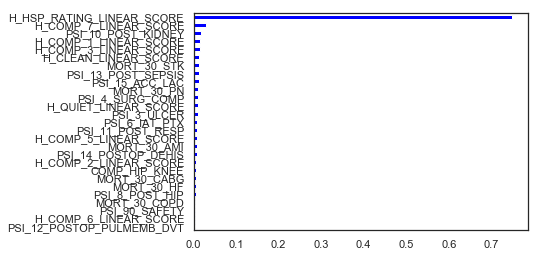

In [176]:
# Check the importance of the features
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_gbrt = pd.Series(gbrt.feature_importances_,
index = X.columns)
# Sort importances_fgbrt
sorted_importances_gbrt = importances_gbrt.sort_values()
# Make a horizontal bar plot
sorted_importances_gbrt.plot(kind='barh', color='blue')
plt.show()

In [177]:
# import the metrics class to compute the confusion matrix
from sklearn import metrics
Y_pred=gbrt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 37,  14,   0,   0,   0],
       [  5, 134,  43,   0,   0],
       [  0,  20, 324,  27,   0],
       [  0,   0,  45, 183,   8],
       [  0,   0,   0,   9,  34]])

Text(0.5, 257.44, 'Predicted label')

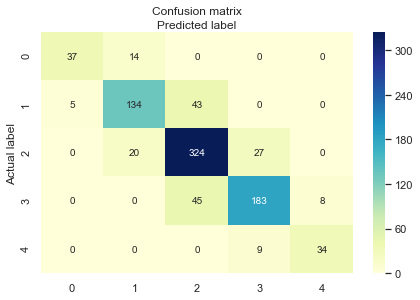

In [178]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# compute the confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [179]:
# Cross Validation
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7761194  0.76603774 0.77735849 0.7509434  0.74621212 0.76136364
 0.79545455 0.76893939 0.81060606 0.78707224]
Mean: 0.774010702654835
Standard Deviation: 0.018813328194241603


### Prepare the hospitaldata_mean Dataset for the Classification Model Run

In [180]:
#Upload hospitaldata_mean.csv
hd_means_GB = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_mean.csv')

In [181]:
# Explore the Means dataset
hd_means_GB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT       3529 non-null float64
PSI_13_POST_SEPSIS              3529 non-null float64
PSI_14_POSTOP_DEHIS             3529 non-null float64
PSI_15_ACC_LAC                  3529 non-null float64
PSI_3_ULCER                     35

In [182]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_means_GB.drop(['H_RECMND_LINEAR_SCORE', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [183]:
# Explore the Means dataset
hd_means_GB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [184]:
#split dataset in features and target variable
X_mg = hd_means_GB[feature_cols] # Features
Y_mg = hd_means_GB.STAR_RATING # Target variable

### Run Gradient Boosted on the hospitaldata_mean Dataset

In [185]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_mg, Y_mg, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_train, Y_train) * 100, 2)

In [186]:
# Check the Gradient Boosted Accuracy against the test dataset
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
acc_train_means  = gbrt.score(X_train, Y_train)
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))
acc_test_means = gbrt.score(X_test, Y_test)

Accuracy on training set: 0.916
Accuracy on test set: 0.815


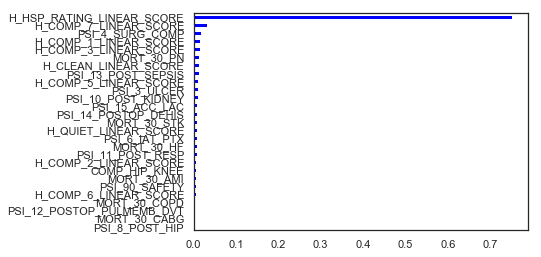

In [187]:
# Check the importance of the features
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_gbrt = pd.Series(gbrt.feature_importances_,
index = X.columns)
# Sort importances_fgbrt
sorted_importances_gbrt = importances_gbrt.sort_values()
# Make a horizontal bar plot
sorted_importances_gbrt.plot(kind='barh', color='blue')
plt.show()

In [188]:
# import the metrics class to compute the confusion matrix
from sklearn import metrics
Y_pred=gbrt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 37,  14,   0,   0,   0],
       [  3, 136,  43,   0,   0],
       [  0,  17, 330,  24,   0],
       [  0,   0,  46, 185,   5],
       [  0,   0,   0,  11,  32]])

Text(0.5, 257.44, 'Predicted label')

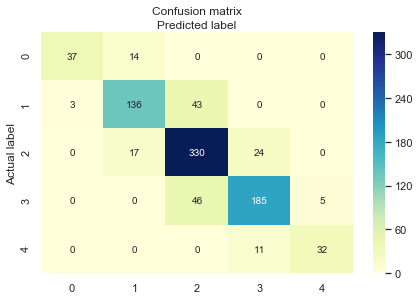

In [189]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# compute the confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
# Cross Validation
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79850746 0.74716981 0.76603774 0.77735849 0.75       0.78030303
 0.79166667 0.76893939 0.82954545 0.76425856]
Mean: 0.7773786601010042
Standard Deviation: 0.02326938057829828


## XGBoost Regression Summary

In [193]:
results = pd.DataFrame({
    'Model': ['XGBoost Iterative', 
              'XGBoost KMeans', 
              'XGBoost Means'],
    'RMSE_Train': [RMSE_iter_t, RMSE_knn_t, RMSE_means_t],
    'RMSE_Test': [RMSE_iter_test, RMSE_knn_test, RMSE_means_test]})
result_df = results.sort_values(by='RMSE_Test', ascending=True)
result_df = result_df.set_index('Model')
result_df

,RMSE_Train,RMSE_Test
Model,,
XGBoost Iterative,0.648198,1.310066
XGBoost Means,0.856367,1.340707
XGBoost KMeans,0.858971,1.347106


## Gradient Boosted Classification Summary

In [192]:
results = pd.DataFrame({
    'Model': ['Gradient Boosted Iterative', 
              'Gradient Boosted KMeans', 
              'Gradient Boosted Means'],
    'Score_Train': [acc_train_iter, acc_train_kmeans, acc_train_means],
    'Score_Test': [acc_test_iter, acc_test_kmeans, acc_test_means]})
result_df = results.sort_values(by='Score_Test', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score_Train,Score_Test
Model,,
Gradient Boosted Iterative,0.925926,0.817667
Gradient Boosted Means,0.915722,0.815402
Gradient Boosted KMeans,0.922147,0.806342


## Recommended Model = Gradient Boosted Classification Using Dataset with Iterative Missing values Imputation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_mean=pd.read_csv('hospitaldata_mean.csv')
df_knn=pd.read_csv('hospitaldata_knn.csv')
df_iterative=pd.read_csv('hospitaldata_iterative.csv')

In [3]:
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,2193,33,3


In [4]:
df_mean.shape

(3529, 40)

In [5]:
c = df_mean['STAR_RATING'].value_counts(dropna=True)
p = df_mean['STAR_RATING'].value_counts(dropna=True, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
3,1612,0.456787
4,890,0.252196
2,683,0.193539
1,180,0.051006
5,164,0.046472


# Drop Last Two Digits of ZIP Code

In [6]:
df_mean['ZIP Code'] = df_mean['ZIP Code'].astype(str).str[:-2].astype(np.int64)
df_knn['ZIP Code'] = df_knn['ZIP Code'].astype(str).str[:-2].astype(np.int64)
df_iterative['ZIP Code'] = df_iterative['ZIP Code'].astype(str).str[:-2].astype(np.int64)

In [7]:
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,363,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,359,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,356,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,364,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,352,2193,33,3


# Model Selection - Mean

In [8]:
y=df_mean['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM"
      ,"H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_QUIET_LINEAR_SCORE"
      #,'ZIP Code'
      #,"H_HSP_RATING_LINEAR_SCORE"
     ]
x=df_mean[cols]

In [9]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(x)
#x_stand = stscaler.transform(x)

In [10]:
#from sklearn.preprocessing import normalize
#x_norm=x.values
# Any Pre-processing needed?
#x_norm = normalize(x_norm)

In [11]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Instantiate individual classifiers
rf = RandomForestClassifier(n_estimators=150, random_state=SEED)
knn = KNN(n_neighbors=11)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
               ('K Nearest Neighbours', knn)
              ]

In [13]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('Accuracy: {:s} : {:.3f}'.format(clf_name,accuracy_score(y_test, y_pred)))
    print('Precision: {:s} : {:.3f}'.format(clf_name,precision_score(y_test, y_pred, average='macro')))
    print('Recall: {:s} : {:.3f}'.format(clf_name,recall_score(y_test, y_pred, average='macro')))
    print('F1 Score: {:s} : {:.3f}'.format(clf_name,f1_score(y_test, y_pred, average='macro')))

Accuracy: Random Forest : 0.661
Precision: Random Forest : 0.672
Recall: Random Forest : 0.562
F1 Score: Random Forest : 0.602
Accuracy: K Nearest Neighbours : 0.598
Precision: K Nearest Neighbours : 0.639
Recall: K Nearest Neighbours : 0.486
F1 Score: K Nearest Neighbours : 0.532


# Feature Importance

In [14]:
model = rf.fit(x_train, y_train)

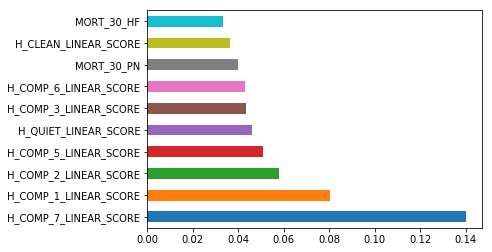

In [15]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')

# Model Selection - KNN

In [16]:
y=df_knn['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM"
      ,"H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_QUIET_LINEAR_SCORE"
      #,'ZIP Code'
      #,"H_HSP_RATING_LINEAR_SCORE"
     ]
x=df_knn[cols]

In [17]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(x)
#x_stand = stscaler.transform(x)

In [18]:
#from sklearn.preprocessing import normalize
#x_norm=x.values
# Any Pre-processing needed?
#x_norm = normalize(x_norm)

In [19]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Instantiate individual classifiers
rf = RandomForestClassifier(n_estimators=125, random_state=SEED)
knn = KNN(n_neighbors=15)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
               ('K Nearest Neighbours', knn)
              ]

In [21]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('Accuracy: {:s} : {:.3f}'.format(clf_name,accuracy_score(y_test, y_pred)))
    print('Precision: {:s} : {:.3f}'.format(clf_name,precision_score(y_test, y_pred, average='macro')))
    print('Recall: {:s} : {:.3f}'.format(clf_name,recall_score(y_test, y_pred, average='macro')))
    print('F1 Score: {:s} : {:.3f}'.format(clf_name,f1_score(y_test, y_pred, average='macro')))

Accuracy: Random Forest : 0.669
Precision: Random Forest : 0.682
Recall: Random Forest : 0.560
F1 Score: Random Forest : 0.603
Accuracy: K Nearest Neighbours : 0.609
Precision: K Nearest Neighbours : 0.635
Recall: K Nearest Neighbours : 0.490
F1 Score: K Nearest Neighbours : 0.532


# Feature Importance

In [22]:
model = rf.fit(x_train, y_train)

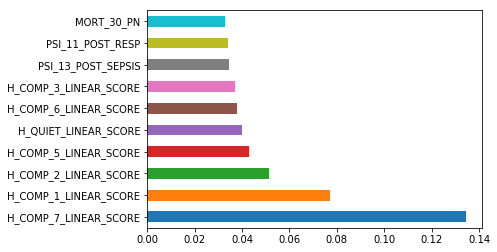

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')

# Model Selection - Iterative

In [24]:
y=df_iterative['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM"
      ,"H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_QUIET_LINEAR_SCORE"
      #,'ZIP Code'
      #,"H_HSP_RATING_LINEAR_SCORE"
     ]
x=df_iterative[cols]

In [25]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(x)
#x_stand = stscaler.transform(x)

In [26]:
#from sklearn.preprocessing import normalize
#x_norm=x.values
# Any Pre-processing needed?
#x_norm = normalize(x_norm)

In [27]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Instantiate individual classifiers
rf = RandomForestClassifier(n_estimators=120, random_state=SEED)
knn = KNN(n_neighbors=15)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
               ('K Nearest Neighbours', knn)
              ]

In [29]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('Accuracy: {:s} : {:.3f}'.format(clf_name,accuracy_score(y_test, y_pred)))
    print('Precision: {:s} : {:.3f}'.format(clf_name,precision_score(y_test, y_pred, average='macro')))
    print('Recall: {:s} : {:.3f}'.format(clf_name,recall_score(y_test, y_pred, average='macro')))
    print('F1 Score: {:s} : {:.3f}'.format(clf_name,f1_score(y_test, y_pred, average='macro')))

Accuracy: Random Forest : 0.700
Precision: Random Forest : 0.731
Recall: Random Forest : 0.595
F1 Score: Random Forest : 0.643
Accuracy: K Nearest Neighbours : 0.623
Precision: K Nearest Neighbours : 0.638
Recall: K Nearest Neighbours : 0.485
F1 Score: K Nearest Neighbours : 0.529


# Feature Importance

In [30]:
model = rf.fit(x_train, y_train)

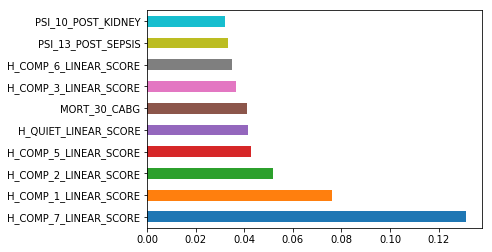

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')

## Import Latest Cleaned Data Set

In [1]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Import data
df_mean = pd.read_csv('hospitaldata_mean.csv.txt')  # filled with mean values
df_iterative = pd.read_csv('hospitaldata_iterative.csv.txt')  # filled with linear regression
df_knn = pd.read_csv('hospitaldata_knn.csv.txt')  # filled with knn

In [3]:
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,2193,33,3


In [4]:
df_mean.drop(["Unnamed: 0", "Unnamed: 0.1", "Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code"], \
             axis = 1, inplace = True)
df_iterative.drop(["Unnamed: 0", "Unnamed: 0.1", "Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code"], \
             axis = 1, inplace = True)
df_knn.drop(["Unnamed: 0", "Unnamed: 0.1", "Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code"], \
             axis = 1, inplace = True)

In [5]:
df_iterative.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,3.0,15.500000,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,...,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0
2,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,1.28,7.19,3.31,...,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0,2.0
3,2.8,14.439599,3.997644,8.3,13.3,21.6,15.9,1.30,9.46,4.76,...,84.0,79.0,85.0,80.0,85.0,86.0,85.0,185.0,27.0,2.0
4,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,1.74,15.22,4.53,...,83.0,77.0,86.0,82.0,87.0,81.0,86.0,2193.0,33.0,3.0


In [6]:
#Drop Star Rating given this is a Regression Model
df_mean.drop(["STAR_RATING"], axis = 1, inplace = True)
df_iterative.drop(["STAR_RATING"], axis = 1, inplace = True)
df_knn.drop(["STAR_RATING"], axis = 1, inplace = True)

## Model Development

<b>Note:</b> The following exercie was performed on each of our data sets, however for the purposes for further analysis we chose the iterative data set based on our iniital modeling results.

### Iterative Imputation Data Set with Full Data Set

#### Set Up Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=4)

#### Set Up X and Y / Train and Test Data Sets

In [8]:
dataset = df_iterative
y = dataset.loc[:,["H_RECMND_LINEAR_SCORE"]]
x = dataset.loc[:,dataset.columns != "H_RECMND_LINEAR_SCORE"]

In [9]:
#Define train_x and train_y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Run Initial Model

In [10]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


####  Evaluate Outputs

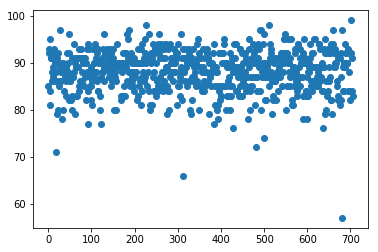

In [11]:
#look at x vs. y_test
plt.scatter(x = range(x_test.shape[0]), y = y_test)

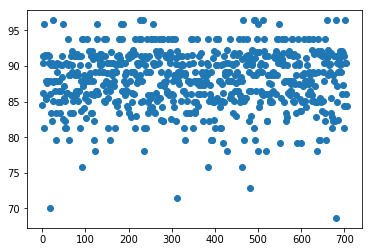

In [12]:
#look at x vs. y_pred
plt.scatter(x = range(x_test.shape[0]), y = y_pred)

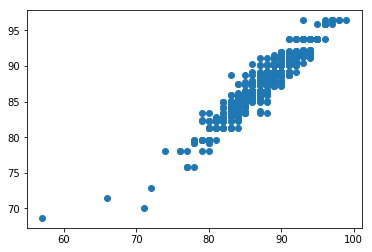

In [13]:
#look at y_test vs. y_pred
plt.scatter(x = y_test, y = y_pred)

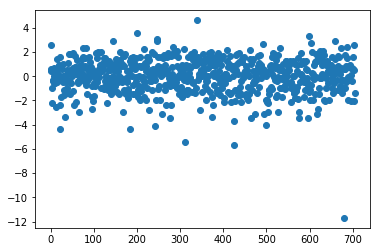

In [14]:
#look at residuals
resids = y_test["H_RECMND_LINEAR_SCORE"] - y_pred

plt.scatter(x = range(x_test.shape[0]), y = resids)

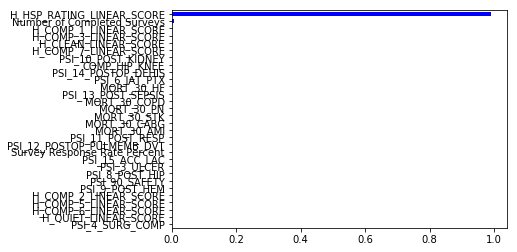

In [15]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

####  Perform Cross Validation of Model

##### Test RMSE

In [16]:
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test RMSE: {:.5f}".format(rmse_dt))

Test RMSE: 1.41057


##### CV RMSE

In [17]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print("CV RMSE: {:.5f}".format(RMSE_CV))

CV RMSE: 1.43683


##### Train MSE

In [18]:
# Predict the labels of the training set
y_pred_train = rf.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

Train RMSE: 1.38119


####  Analysis

Based on the results of our cross-validation, our model is likely overfitting. This may be due to our relatively small data set size and/or our use of a large number of features. For further analysis, we recommend feature engineering to see if we can reduce our overfitting problem.

### Iterative Imputation Data Set with Modified Data Set to Reduce Overfitting

#### Set Up Random Forest Regression Model

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth = 4)

In [20]:
dataset.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent
0,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,...,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0
1,3.0,15.500000,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,...,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0
2,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,1.28,7.19,3.31,...,91.0,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0
3,2.8,14.439599,3.997644,8.3,13.3,21.6,15.9,1.30,9.46,4.76,...,94.0,84.0,79.0,85.0,80.0,85.0,86.0,85.0,185.0,27.0
4,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,1.74,15.22,4.53,...,91.0,83.0,77.0,86.0,82.0,87.0,81.0,86.0,2193.0,33.0


#### Set Up X and Y / Train and Test Data Sets

In [21]:
dataset = df_iterative
y = dataset.loc[:,["H_RECMND_LINEAR_SCORE"]]
x_mod = dataset.loc[:,dataset.columns != "H_RECMND_LINEAR_SCORE"]
x_mod = x_mod.drop(["H_HSP_RATING_LINEAR_SCORE", "H_COMP_7_LINEAR_SCORE", "H_COMP_1_LINEAR_SCORE", "H_COMP_2_LINEAR_SCORE", \
                   "H_COMP_5_LINEAR_SCORE", "H_COMP_6_LINEAR_SCORE"], axis = 1)
#x_mod = x_mod.loc[:, ["H_HSP_RATING_LINEAR_SCORE", "H_QUIET_LINEAR_SCORE", "Number of Completed Surveys"]]
#x_mod.drop(["H_HSP_RATING_LINEAR_SCORE", "H_COMP_7_LINEAR_SCORE", "H_COMP_1_LINEAR_SCORE", "H_COMP_2_LINEAR_SCORE",\
#           "H_COMP_5_LINEAR_SCORE", "H_COMP_3_LINEAR_SCORE", "H_COMP_6_LINEAR_SCORE", "H_CLEAN_LINEAR_SCORE",\
#           "H_QUIET_LINEAR_SCORE", "Survey Response Rate Percent", "MORT_30_CABG", "Number of Completed Surveys", \
#           "PSI_11_POST_RESP", "MORT_30_AMI"], axis = 1, inplace = True)

<b>Note:</b> This step was performed several times with various combinations of features based upon the model outputs (e.g., feature importance, cross validation results, etc.). In addition, this exercise was attempted with various model parameters (e.g., maximum depth and minimum leaf size). For the purposes of this workbook, only one iteration is shown.

In [22]:
#Define train_x and train_y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_mod,y,test_size=0.2,random_state=0)

#### Run Initial Model

In [23]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


####  Evaluate Outputs

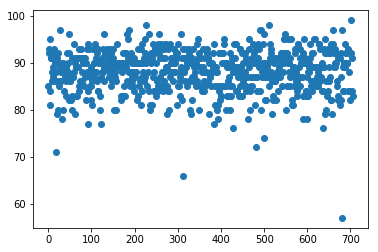

In [24]:
#look at x vs. y_test
plt.scatter(x = range(x_test.shape[0]), y = y_test)

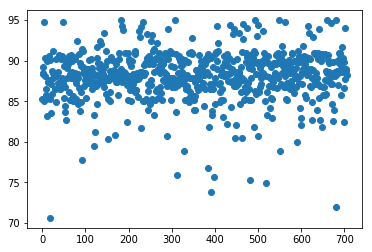

In [25]:
#look at x vs. y_pred
plt.scatter(x = range(x_test.shape[0]), y = y_pred)

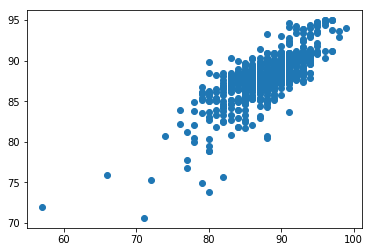

In [26]:
#look at y_test vs. y_pred
plt.scatter(x = y_test, y = y_pred)

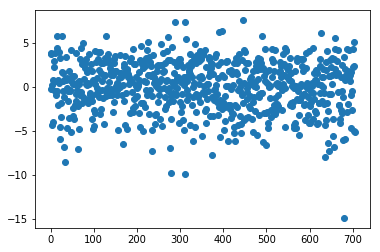

In [27]:
#look at residuals
resids = y_test["H_RECMND_LINEAR_SCORE"] - y_pred

plt.scatter(x = range(x_test.shape[0]), y = resids)

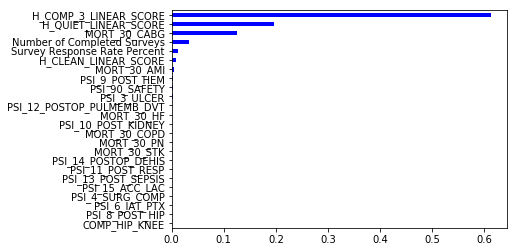

In [28]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x_mod.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

####  Perform Cross Validation of Model

##### Test RMSE

In [29]:
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test RMSE: {:.5f}".format(rmse_dt))

Test RMSE: 2.89547


##### CV RMSE

In [30]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print("CV RMSE: {:.5f}".format(RMSE_CV))

CV RMSE: 2.87115


##### Train MSE

In [31]:
# Predict the labels of the training set
y_pred_train = rf.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

Train RMSE: 2.68913


## Conclusion

Based upon the cross-validation results accross several iterations of the random forest regression model - based upon modifying the features used and tuning the model parameters - we were unable to develop an effective model that did not overfit. We believe this may be due to the decision tree approach utilized by the random forest model and the relative small size of the data (approximately 3,500 hospitals). Therefore, we ultimately do not recommend utilizing the Random Forest Regression model.